In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sequence_jacobian as sj
import tutorial_closed_econ_monetary as tutil
from aquarel import load_theme

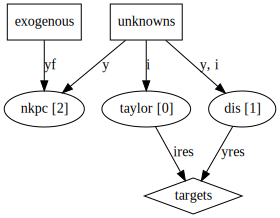

In [2]:

@sj.simple
def nkpc(theta, eta, y, yf, beta, sigma, pi):
    kappa = ((1-theta)*(1-theta*beta))/theta*(sigma+eta)
    pires = kappa*(y - yf) + beta*pi(1) - pi
    
    return pires, kappa

@sj.simple
def dis(y, sigma, i, pi):
    yres = y(1) - (1/sigma)*(i - pi(1)) - y
    
    return yres

@sj.simple
def taylor(i, rho, phipi, pi, u):
    ires = rho*i(-1) + (1-rho)*phipi*pi - i + u
    
    return ires

nk3 = sj.create_model([nkpc, dis, taylor], name = "3 NK")

sj.drawdag(nk3, exogenous={'yf'}, unknowns={'y', 'i'}, targets={'yres', 'ires'})

In [3]:
cal_3nk = {'theta': 0.75, 'eta':1, 'beta': 0.98, 'sigma': 1., 'phipi': 1.5,
           'rho': 0.8, 'yf': 0., 'pi': 0., 'u': 0.}
ss_3nk = nk3.solve_steady_state(cal_3nk, {'y': 0., 'i': 0.}, {'pires', 'ires'}, solver='hybr')
ss_3nk.toplevel


{'theta': 0.75,
 'eta': 1,
 'beta': 0.98,
 'sigma': 1.0,
 'phipi': 1.5,
 'rho': 0.8,
 'yf': 0.0,
 'pi': 0.0,
 'u': 0.0,
 'y': 0.0,
 'i': 0.0,
 'ires': 0.0,
 'yres': 0.0,
 'pires': 0.0,
 'kappa': 0.17666666666666667}

Solving 3 NK for ['y', 'pi', 'i'] to hit ['pires', 'yres', 'ires']
On iteration 0
   max error for pires is 1.77E-03
   max error for yres is 0.00E+00
   max error for ires is 0.00E+00
On iteration 1
   max error for pires is 8.51E-18
   max error for yres is 0.00E+00
   max error for ires is 1.63E-18
Solving 3 NK for ['y', 'pi', 'i'] to hit ['pires', 'yres', 'ires']
On iteration 0
   max error for pires is 0.00E+00
   max error for yres is 0.00E+00
   max error for ires is 1.00E-02
On iteration 1
   max error for pires is 1.73E-18
   max error for yres is 0.00E+00
   max error for ires is 3.90E-18


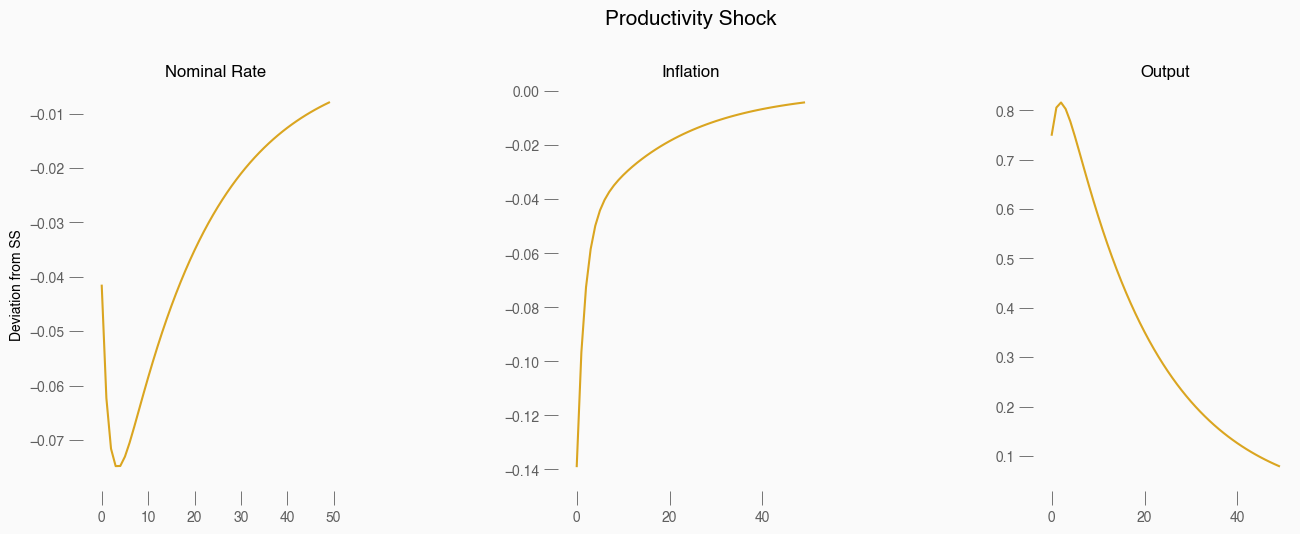

In [4]:
T = 500

# For Fiscal Shock at time t = 5
# du = 0.01 * 0.6 ** np.arange(T)
du = np.zeros(T)
du[0] = 0.01

# For permanent monetary shock at time t = 2
da = 0.01 * 0.95 ** np.arange(T)

irf2 = nk3.solve_impulse_nonlinear(ss_3nk, ['y', 'pi', 'i'], ['pires', 'yres', 'ires'], {'yf': da})
irf22 = nk3.solve_impulse_nonlinear(ss_3nk, ['y', 'pi', 'i'], ['pires', 'yres', 'ires'], {'u': du})

Thorizon = 50

theme = load_theme("minimal_light")
theme.apply()
ax0 = plt.figure(figsize=(15, 5)) 
ax0.set_facecolor('#FAFAFA')

ax1 = plt.subplot(1,3,1)
plt.plot(100*irf2['i'][:Thorizon], label = 'Nominal Rate', color = 'goldenrod')
plt.ylabel('Deviation from SS')
plt.title('Nominal Rate')
ax1.set_facecolor('#FAFAFA')

ax2 = plt.subplot(1,3,2)
plt.plot(100*irf2['pi'][:Thorizon], label = 'Inflation', color = 'goldenrod')
plt.title('Inflation')
ax2.set_facecolor('#FAFAFA')

ax3 = plt.subplot(1,3,3)
plt.plot(100*irf2['y'][:Thorizon], label = 'Output', color = 'goldenrod')
plt.title('Output')
ax3.set_facecolor('#FAFAFA')

theme.apply_transforms()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.7)
plt.suptitle('Productivity Shock', y=1.05, fontsize=15)

plt.show()

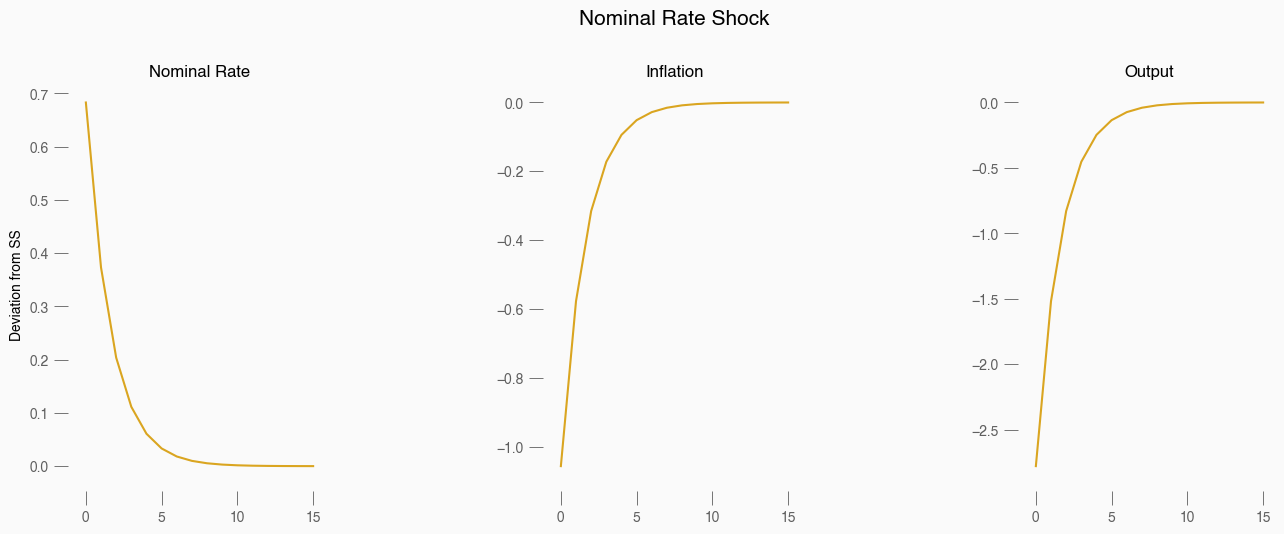

In [5]:
Thorizon = 16

theme = load_theme("minimal_light")
theme.apply()
ax0 = plt.figure(figsize=(15, 5)) 
ax0.set_facecolor('#FAFAFA')

ax1 = plt.subplot(1,3,1)
plt.plot(100*irf22['i'][:Thorizon], label = 'Nominal Rate', color = 'goldenrod')
plt.ylabel('Deviation from SS')
plt.title('Nominal Rate')
ax1.set_facecolor('#FAFAFA')

ax2 = plt.subplot(1,3,2)
plt.plot(100*irf22['pi'][:Thorizon], label = 'Inflation', color = 'goldenrod')
plt.title('Inflation')
ax2.set_facecolor('#FAFAFA')

ax3 = plt.subplot(1,3,3)
plt.plot(100*irf22['y'][:Thorizon], label = 'Output', color = 'goldenrod')
plt.title('Output')
ax3.set_facecolor('#FAFAFA')

theme.apply_transforms()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.7)
plt.suptitle('Nominal Rate Shock', y=1.05, fontsize=15)

plt.show()